In [36]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
#!pip install torch
from torch.autograd import Variable
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import torch
import math
import warnings
warnings.filterwarnings('ignore')

In [38]:
EURGBP_data = pd.read_csv("EURGBP.csv", parse_dates=[0] ,names=["DateTime", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"] ) 
EURUSD_data = pd.read_csv("EURUSD.csv", parse_dates=[0] ,names=["DateTime", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]) 
GBPUSD_data = pd.read_csv("GBPUSD.csv", parse_dates=[0] ,names=["DateTime", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]) 

In [39]:
EURGBP_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-01-01 17:00:00,0.81201,0.81201,0.81198,0.81200,0
1,2013-01-01 17:01:00,0.81199,0.81203,0.81199,0.81202,0
2,2013-01-01 17:03:00,0.81203,0.81248,0.81202,0.81248,0
3,2013-01-01 17:04:00,0.81284,0.81291,0.81284,0.81291,0
4,2013-01-01 17:05:00,0.81290,0.81299,0.81219,0.81219,0
...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,0.83060,0.83060,0.83059,0.83059,0
364908,2013-12-31 15:56:00,0.83058,0.83062,0.83056,0.83062,0
364909,2013-12-31 15:57:00,0.83063,0.83070,0.83062,0.83070,0
364910,2013-12-31 15:58:00,0.83066,0.83073,0.83066,0.83071,0


In [40]:
EURUSD_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-01-01 17:00:00,1.32041,1.32041,1.32034,1.32034,0
1,2013-01-01 17:01:00,1.32039,1.32046,1.32034,1.32046,0
2,2013-01-01 17:03:00,1.32049,1.32050,1.32009,1.32025,0
3,2013-01-01 17:04:00,1.32023,1.32025,1.32023,1.32025,0
4,2013-01-01 17:05:00,1.32027,1.32028,1.32026,1.32026,0
...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,1.37588,1.37588,1.37579,1.37579,0
364908,2013-12-31 15:56:00,1.37576,1.37580,1.37576,1.37578,0
364909,2013-12-31 15:57:00,1.37577,1.37578,1.37565,1.37567,0
364910,2013-12-31 15:58:00,1.37574,1.37574,1.37562,1.37569,0


In [41]:
GBPUSD_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-01-01 17:00:00,1.62559,1.62559,1.62553,1.62553,0
1,2013-01-01 17:01:00,1.62554,1.62555,1.62527,1.62527,0
2,2013-01-01 17:03:00,1.62556,1.62556,1.62405,1.62405,0
3,2013-01-01 17:04:00,1.62475,1.62475,1.62365,1.62385,0
4,2013-01-01 17:05:00,1.62383,1.62408,1.62345,1.62366,0
...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,1.65623,1.65623,1.65614,1.65614,0
364908,2013-12-31 15:56:00,1.65616,1.65619,1.65602,1.65605,0
364909,2013-12-31 15:57:00,1.65601,1.65602,1.65575,1.65575,0
364910,2013-12-31 15:58:00,1.65574,1.65581,1.65574,1.65575,0


In [42]:
EURGBP_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2013-01-01 17:00:00,0.81201,0.81201,0.81198,0.81200,0
1,2013-01-01 17:01:00,0.81199,0.81203,0.81199,0.81202,0
2,2013-01-01 17:03:00,0.81203,0.81248,0.81202,0.81248,0
3,2013-01-01 17:04:00,0.81284,0.81291,0.81284,0.81291,0
4,2013-01-01 17:05:00,0.81290,0.81299,0.81219,0.81219,0
...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,0.83060,0.83060,0.83059,0.83059,0
364908,2013-12-31 15:56:00,0.83058,0.83062,0.83056,0.83062,0
364909,2013-12-31 15:57:00,0.83063,0.83070,0.83062,0.83070,0
364910,2013-12-31 15:58:00,0.83066,0.83073,0.83066,0.83071,0


# Prediction

In [43]:
# rolling window of the Open stock price
#for every single stock prediction we look 60 minutes back, collect the values in the column that are in this range, and get the average/min/max/sum/standard deviation of the values     
EURGBP_data['OpenMean'] = EURGBP_data['OPEN'].rolling(60).mean()
EURGBP_data['OpenMin'] = EURGBP_data['OPEN'].rolling(60).min()   
EURGBP_data['OpenMax'] = EURGBP_data['OPEN'].rolling(60).max()   
EURGBP_data['OpenStd'] = EURGBP_data['OPEN'].rolling(60).std()    
EURGBP_data['OpenSum'] = EURGBP_data['OPEN'].rolling(60).sum()

#drop the first entries that are NaN values for the stats
EURGBP_data = EURGBP_data.dropna()

EURGBP_data

,DateTime,OPEN,HIGH,LOW,CLOSE,VOLUME,OpenMean,OpenMin,OpenMax,OpenStd,OpenSum
59,2013-01-01 18:02:00,0.81234,0.81234,0.81234,0.81234,0,0.812638,0.81199,0.81294,0.000222,48.75829
60,2013-01-01 18:03:00,0.81236,0.81245,0.81236,0.81245,0,0.812644,0.81199,0.81294,0.000209,48.75864
61,2013-01-01 18:04:00,0.81244,0.81245,0.81244,0.81245,0,0.812651,0.81203,0.81294,0.000193,48.75909
62,2013-01-01 18:05:00,0.81244,0.81248,0.81240,0.81247,0,0.812658,0.81223,0.81294,0.000177,48.75950
63,2013-01-01 18:06:00,0.81246,0.81246,0.81227,0.81231,0,0.812652,0.81223,0.81294,0.000177,48.75912
...,...,...,...,...,...,...,...,...,...,...,...
364907,2013-12-31 15:55:00,0.83060,0.83060,0.83059,0.83059,0,0.830122,0.82986,0.83079,0.000258,49.80729
364908,2013-12-31 15:56:00,0.83058,0.83062,0.83056,0.83062,0,0.830118,0.82986,0.83072,0.000250,49.80708
364909,2013-12-31 15:57:00,0.83063,0.83070,0.83062,0.83070,0,0.830117,0.82986,0.83063,0.000247,49.80699
364910,2013-12-31 15:58:00,0.83066,0.83073,0.83066,0.83071,0,0.830118,0.82986,0.83066,0.000251,49.80710


In [44]:
# X features: (OpenMean, OpenMin, OpenMax, OpenStd, OpenSum)
# y: Close price
X = EURGBP_data.iloc[:, [6,7,8,9,10]].values 
y = EURGBP_data.iloc[:, 4].values

### LSTM

In [45]:
from sklearn.model_selection import TimeSeriesSplit

#Split data into test and training sets
splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(X,y):
    Xtrain = X[train_index]
    Xtest = X[test_index]
    ytrain = y[train_index]
    ytest = y[test_index]

Xtrain = torch.from_numpy(Xtrain).float()
Xtest = torch.from_numpy(Xtest).float()
ytrain = torch.from_numpy(ytrain).float()
ytest = torch.from_numpy(ytest).float()

#because the input needs to be 3D, an additional dimension is added
Xtrain = Xtrain.unsqueeze(2)
Xtest = Xtest.unsqueeze(2)
ytrain = ytrain.unsqueeze(1)
ytest = ytest.unsqueeze(1)

In [46]:
##--From the pytorch documentation:

#input_size: number of expected features in the input x

#hidden_size: The number of features in the hidden state h

#num_layers: Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two LSTMs together to form a stacked LSTM, with the second LSTM taking in outputs of the first LSTM and computing the final results. Default: 1

#bias: If False, then the layer does not use bias weights b_ih and b_hh. Default: True

#batch_first: If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature)

#output_size: size of each output sample

In [76]:
class LSTMCell(nn.Module):

    def __init__(self, hidden_size, input_size, bias=True):
        super(LSTMCell, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
        self.c2c = Tensor(hidden_size * 3)
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        standev = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-standev, standev)
    
    def forward(self, x, hidden):
        h_x, c_x = hidden
        x = x.view(-1, x.size(1))
        
        gates = self.x2h(x) + self.h2h(h_x)
        gates = gates.squeeze()
        c2c = self.c2c.unsqueeze(0)
        c_i, c_f, c_o = c2c.chunk(3,1)
        
        inputgate, forgetgate, cell, outputgate = gates.chunk(4, 1)
        inputgate = torch.sigmoid(inputgate+ c_i * c_x)
        forgetgate = torch.sigmoid(forgetgate + c_f * c_x)
        cell = forgetgate*c_x + inputgate* torch.tanh(cell)
        outputgate = torch.sigmoid(outputgate+ c_o*cell)

        hm = outputgate * F.tanh(cell)
        
        return (hm, cell)

In [77]:
class LSTM(nn.Module):

    def __init__(self, output_size, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.output_size = output_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        #LSTM Cell unit and a linear layer to model time series
        self.lstm = LSTMCell(hidden_size, input_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        outs = []      
        c_n = c_0[0,:,:]
        h_n = h_0[0,:,:]
        
        for seq in range(x.size(1)):
            h_n, c_n = self.lstm(x[:,seq,:], (h_n,c_n)) 
            outs.append(h_n)      
        out = outs[-1].squeeze()        
        out = self.fc(out) 
        
        return out
    

## Training

In [78]:
num_epochs = 1000 
learning_rate = 0.001 

input_size = 1
hidden_size = 5  
num_layers = 1 

output_size = 1

lstm = LSTM(output_size, input_size, hidden_size, num_layers)

loss_function = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    outputs = lstm(Xtrain)
    optimizer.zero_grad()

    loss = loss_function(outputs, ytrain)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
    


Epoch: 0, loss: 2.60649
Epoch: 100, loss: 1.03202
Epoch: 200, loss: 0.02162
Epoch: 300, loss: 0.00084
Epoch: 400, loss: 0.00010
Epoch: 500, loss: 0.00010
Epoch: 600, loss: 0.00010
Epoch: 700, loss: 0.00010
Epoch: 800, loss: 0.00010
Epoch: 900, loss: 0.00010


In [50]:
outputs

tensor([[0.8542],
        [0.8542],
        [0.8542],
        ...,
        [0.8512],
        [0.8512],
        [0.8512]], grad_fn=<AddmmBackward0>)

## Testing

In [52]:
lstm.eval()
testoutputs = lstm(Xtest)

from sklearn.metrics import mean_squared_error, r2_score

#change to numpy array
testoutputs = torch.detach(testoutputs).numpy()
ytest = torch.detach(ytest).numpy()

#calculate root mean squared error
rmse = np.sqrt(mean_squared_error(ytest, testoutputs))
mse = mean_squared_error(ytest, testoutputs)

print('%.2f RMSE' % (rmse))
print('%.2f MSE' % (mse))
print('R2 Score: ', r2_score(ytest, testoutputs))

0.02 RMSE
0.00 MSE
R2 Score:  -6.593406997491917


In [53]:
testoutputs

array([[0.85121286],
       [0.851212  ],
       [0.85121167],
       ...,
       [0.85305935],
       [0.8530597 ],
       [0.8530597 ]], dtype=float32)

## Profit/loss algorithm

In [56]:
df = pd.DataFrame(testoutputs, columns = ['predictedPrice'])
df['actualPrice'] = ytest
df['return_pred'] = df['predictedPrice'] - df['predictedPrice'].shift(1)
df['return_actual'] = df['actualPrice'] - df['actualPrice'].shift(1)

In [57]:
df

,predictedPrice,actualPrice,return_pred,return_actual
0,0.851213,0.85673,NaN,NaN
1,0.851212,0.85675,-8.344650e-07,0.00002
2,0.851212,0.85675,-3.576279e-07,0.00000
3,0.851211,0.85675,-7.748604e-07,0.00000
4,0.851210,0.85667,-8.344650e-07,-0.00008
...,...,...,...,...
60803,0.853061,0.83059,-5.364418e-07,-0.00002
60804,0.853061,0.83062,-8.344650e-07,0.00003
60805,0.853059,0.83070,-1.192093e-06,0.00008
60806,0.853060,0.83071,3.576279e-07,0.00001


In [58]:
df['return_pred'][0] = 0
df['return_actual'][0] = 0
df

,predictedPrice,actualPrice,return_pred,return_actual
0,0.851213,0.85673,0.000000e+00,0.00000
1,0.851212,0.85675,-8.344650e-07,0.00002
2,0.851212,0.85675,-3.576279e-07,0.00000
3,0.851211,0.85675,-7.748604e-07,0.00000
4,0.851210,0.85667,-8.344650e-07,-0.00008
...,...,...,...,...
60803,0.853061,0.83059,-5.364418e-07,-0.00002
60804,0.853061,0.83062,-8.344650e-07,0.00003
60805,0.853059,0.83070,-1.192093e-06,0.00008
60806,0.853060,0.83071,3.576279e-07,0.00001


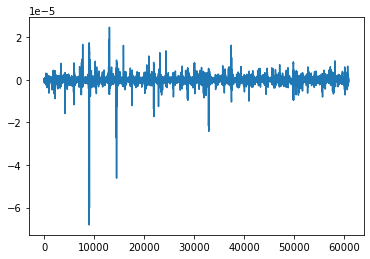

In [59]:
plt.plot(df.return_pred)
plt.show()

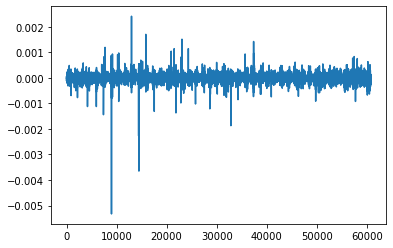

In [60]:
plt.plot(df.return_actual)
plt.show()

In [61]:
#create labels: 1 if price is rising. 0 if price is falling

In [62]:
df['label_pred'] = df['return_pred']
df['label_pred'] = df['label_pred'].apply(lambda x: 1 if x>0.0 else 0)
df['label_actual'] = df['return_actual']
df['label_actual'] = df['label_actual'].apply(lambda x: 1 if x>0.0 else 0)

In [63]:
# contracts and commission
contracts  = 10000.0
commission = 0.0

In [64]:
df['won'] = df['label_pred'] == df['label_actual']
df

,predictedPrice,actualPrice,return_pred,return_actual,label_pred,label_actual,won
0,0.851213,0.85673,0.000000e+00,0.00000,0,0,True
1,0.851212,0.85675,-8.344650e-07,0.00002,0,1,False
2,0.851212,0.85675,-3.576279e-07,0.00000,0,0,True
3,0.851211,0.85675,-7.748604e-07,0.00000,0,0,True
4,0.851210,0.85667,-8.344650e-07,-0.00008,0,0,True
...,...,...,...,...,...,...,...
60803,0.853061,0.83059,-5.364418e-07,-0.00002,0,0,True
60804,0.853061,0.83062,-8.344650e-07,0.00003,0,1,False
60805,0.853059,0.83070,-1.192093e-06,0.00008,0,1,False
60806,0.853060,0.83071,3.576279e-07,0.00001,1,1,True


In [66]:
def calc_profit(row):
    if row['won']:
        return abs(row['return_actual'])*contracts - commission
    else:
        return -abs(row['return_actual'])*contracts - commission

In [67]:
df['profit&loss'] = df.apply(lambda row: calc_profit(row), axis=1)
df['equity'] = df['profit&loss'].cumsum()

In [68]:
df

,predictedPrice,actualPrice,return_pred,return_actual,label_pred,label_actual,won,pnl,equity
0,0.851213,0.85673,0.000000e+00,0.00000,0,0,True,0.000000,0.000000
1,0.851212,0.85675,-8.344650e-07,0.00002,0,1,False,-0.200272,-0.200272
2,0.851212,0.85675,-3.576279e-07,0.00000,0,0,True,0.000000,-0.200272
3,0.851211,0.85675,-7.748604e-07,0.00000,0,0,True,0.000000,-0.200272
4,0.851210,0.85667,-8.344650e-07,-0.00008,0,0,True,0.799894,0.599623
...,...,...,...,...,...,...,...,...,...
60803,0.853061,0.83059,-5.364418e-07,-0.00002,0,0,True,0.199676,524.451733
60804,0.853061,0.83062,-8.344650e-07,0.00003,0,1,False,-0.299811,524.151921
60805,0.853059,0.83070,-1.192093e-06,0.00008,0,1,False,-0.799894,523.352027
60806,0.853060,0.83071,3.576279e-07,0.00001,1,1,True,0.100136,523.452163


Net Profit            : $524.35
Number Winning Trades : 27924
Number Losing Trades  : 27259
Avg Win Trade         : $0.624
Avg Los Trade         : $-0.620
Percent Profitable    : 50.60%
Largest Win Trade     : $53.300
Largest Los Trade     : $-19.000


(-6.0, 6.0)

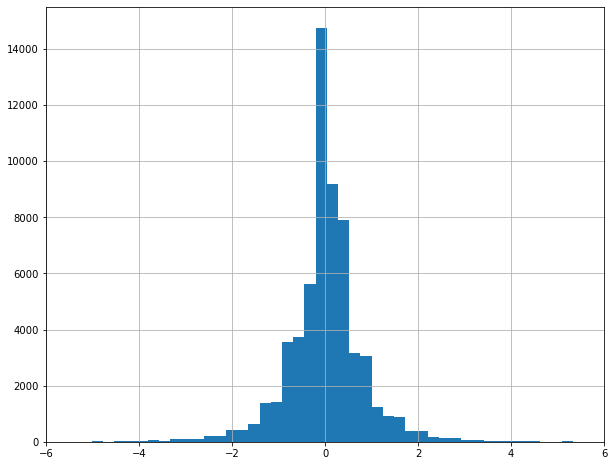

In [71]:
# summary of trades

n_win = float(df[df['profit&loss']>0.0]['profit&loss'].count())
n_los = float(df[df['profit&loss']<0.0]['profit&loss'].count())
print("Net Profit            : $%.2f" % df.tail(1)['equity'])
print("Number Winning Trades : %d" % n_win)
print("Number Losing Trades  : %d" % n_los)
print("Avg Win Trade         : $%.3f" % df[df['profit&loss']>0.0]['profit&loss'].mean())
print("Avg Los Trade         : $%.3f" % df[df['profit&loss']<0.0]['profit&loss'].mean())
print("Percent Profitable    : %.2f%%" % (100*n_win/(n_win + n_los)))
print("Largest Win Trade     : $%.3f" % df[df['profit&loss']>0.0]['profit&loss'].max())
print("Largest Los Trade     : $%.3f" % df[df['profit&loss']<0.0]['profit&loss'].min())

df['profit&loss'].hist(bins=300, figsize=(10, 8))
plt.xlim(-6, 6)